In [3]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.cm, matplotlib.colors
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, manifold

from time import time
import time
import warnings
from itertools import cycle, islice

import matplotlib.gridspec as gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from sklearn.cluster import BisectingKMeans, KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.neighbors import NearestNeighbors

## Essential functions

In [3]:
def plot_clusters(data, db_data, labels, n_clusters, noise='k'):
    
    '''
    Parametry:
    - data (numpy.ndarray): Dwuwymiarowa tablica zawierająca dane, gdzie każdy wiersz reprezentuje jedną próbkę, a każda kolumna to cecha.
    - db_data: Wytrenowany model
    - labels (numpy.ndarray): Jednowymiarowa tablica zawierająca przypisane etykiety dla każdej próbki w danych.
    - n_clusters (int): Szacowana liczba klastrów w danych.
    - noise: Domyślnie 'k', opcjonalnie do wyboru kolor 'none'

    '''
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db_data.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
            pass

        class_member_mask = labels == k
        xy = data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=col,
            markersize=10,
        )

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=noise, #or none
            markersize=0.5,
        )

    plt.title(f"Estimated number of clusters: {n_clusters}")
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters_sns(data, db_data, labels, n_clusters, noise='k', xlim=None, ylim=None):
    '''
    Parametry:
    - data (numpy.ndarray): Dwuwymiarowa tablica zawierająca dane, gdzie każdy wiersz reprezentuje jedną próbkę, a każda kolumna to cecha.
    - db_data: Wytrenowany model
    - labels (numpy.ndarray): Jednowymiarowa tablica zawierająca przypisane etykiety dla każdej próbki w danych.
    - n_clusters (int): Szacowana liczba klastrów w danych.
    - noise: Domyślnie 'k', opcjonalnie do wyboru kolor 'none'
    - xlim: Tuple (xmin, xmax) - zakres osi x
    - ylim: Tuple (ymin, ymax) - zakres osi y
    '''

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db_data.core_sample_indices_] = True

    # Użyj palety kolorów z biblioteki seaborn
    palette = sns.color_palette("husl", len(unique_labels))

    for k, col in zip(unique_labels, palette):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
            pass

        class_member_mask = labels == k
        xy = data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=col,
            markersize=10,
        )

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=noise,
            markersize=0.5,
        )

    plt.title(f"Estimated number of clusters: {n_clusters}")
    
    # Ustaw zakresy osi x i y, jeśli dostarczone
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    
    plt.show()

# Przykład użycia:
# plot_clusters(data, db_data, labels, n_clusters, xlim=(xmin, xmax), ylim=(ymin, ymax))


## Code

In [4]:
data_1 = np.loadtxt('c12_data.txt', delimiter='\t')
data_2 = np.loadtxt('c12_noise_data.txt', delimiter='\t')
data_3 = np.loadtxt('3N_forces_data.txt', delimiter='\t')
data_4 = np.loadtxt('3N_forces_noise_data.txt', delimiter='\t')

In [19]:
#Best Parameters: eps=4, min_samples=253 or 10 min samp 100, 20  45, eps3 min170
db_data_3 = DBSCAN(eps=4.3, min_samples=145).fit(data_3)
labels_data_3 = db_data_3.labels_

n_clusters_data_3 = len(set(labels_data_3)) - (1 if -1 in labels_data_3 else 0)
n_noise_data_3 = list(labels_data_3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_3)
print("Estimated number of noise points: %d" % n_noise_data_3)

Estimated number of clusters: 2
Estimated number of noise points: 32390


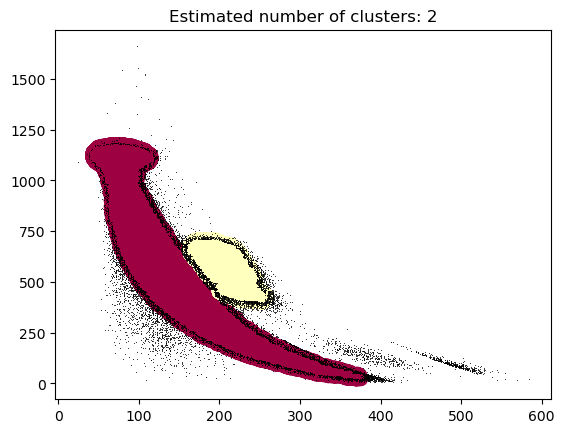

In [20]:
plot_clusters(data_3, db_data_3, labels_data_3, n_clusters_data_3, noise='none')

In [61]:
db_data_4 = DBSCAN(eps=4.3, min_samples=187).fit(data_4)
labels_data_4 = db_data_4.labels_

n_clusters_data_4 = len(set(labels_data_4)) - (1 if -1 in labels_data_4 else 0)
n_noise_data_4 = list(labels_data_4).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_4)
print("Estimated number of noise points: %d" % n_noise_data_4)

Estimated number of clusters: 2
Estimated number of noise points: 136929


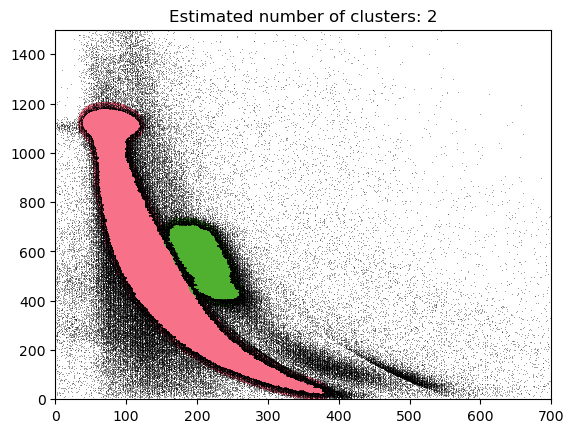

In [62]:
plot_clusters_sns(data_4, db_data_4, labels_data_4, n_clusters_data_4, noise='none', xlim=(0, 700), ylim=(0, 1500))

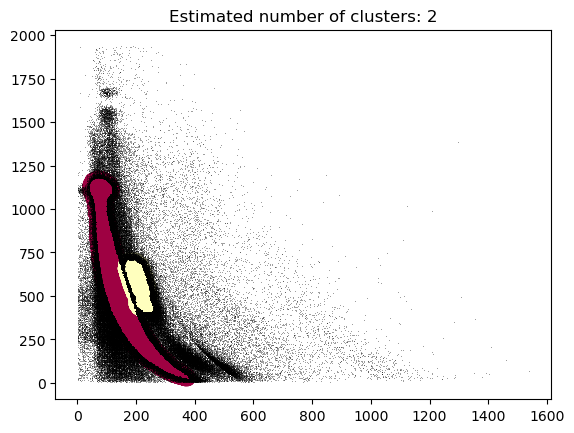

In [55]:
plot_clusters(data_4, db_data_4, labels_data_4, n_clusters_data_4, noise='none')

## OPTICS

In [25]:
start_time = time.time()
max_eps = 25
min_samples = 700
optics = OPTICS(max_eps=max_eps, #25
                min_samples=min_samples, #500
                metric='minkowski',
                n_jobs=4,
               ).fit(data_2)

end_time = time.time()
execution_time = end_time - start_time

labels = optics.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Max_eps: {max_eps}, min_samples: {min_samples}")

Estimated number of clusters: 3
Estimated number of noise points: 13560
Max_eps: 25, min_samples: 700


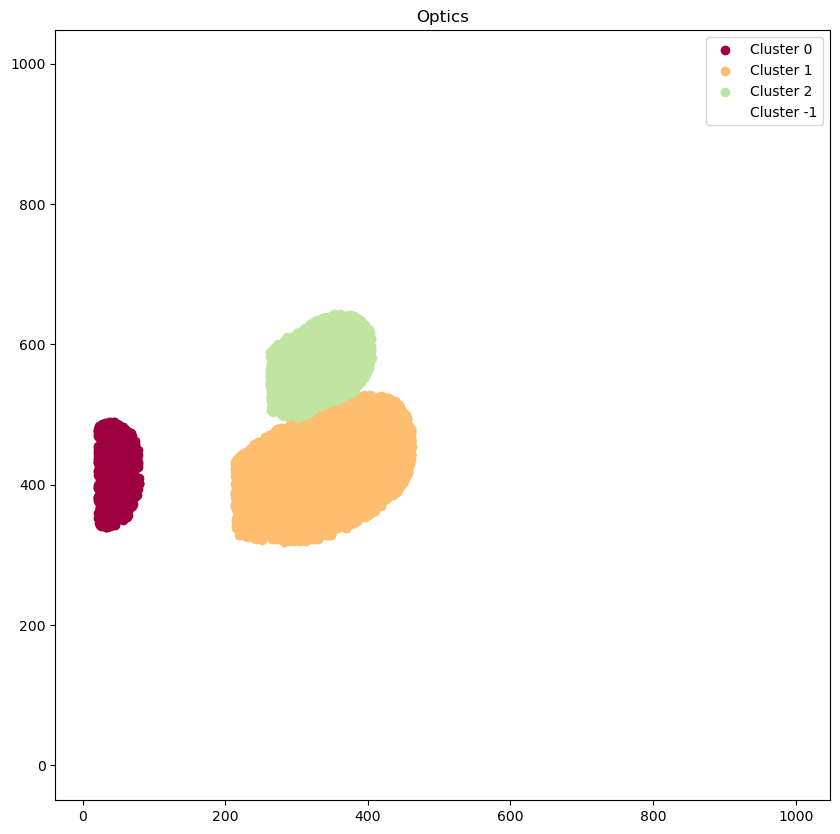

In [27]:
plt.figure(figsize=(10, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'none'  #  'k' Czarny kolor dla punktów odstających
        
    class_member_mask = (labels == label)
    xy = data_2[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Optics')
plt.legend(loc='upper right')
plt.show()

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#bandwidth = estimate_bandwidth(data_1, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=150, bin_seeding=True)
ms.fit(data_1)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


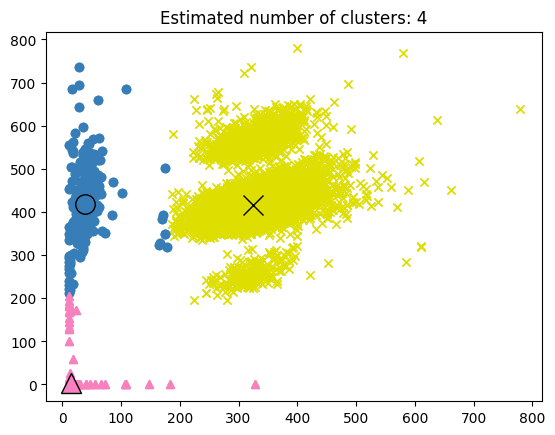

In [20]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data_1[my_members, 0], data_1[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()